# 2値化
- 白黒画像化
    - しきい値より低ければ黒、高ければ白
    - 0,1のみで表せるので処理が高速

In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread("src/grapes.jpg", 0)
cv2.imshow("img",img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
# しきい値
threshold = 100
# しきい値、2値化された画像
# 画像、しきい値、しきい値を超えていた場合の色、2値化の方法
ret, img_th = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)

In [4]:
ret

100.0

In [6]:
cv2.imshow("img_th",img_th)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
# OTSU: 自動的にしきい値を決定
# グレースケールの中の白と黒をいい感じに分離する
# 白と黒の中間に色が集中しているとうまくいかない事が多い
ret2, img_o = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)

In [10]:
ret2

121.0

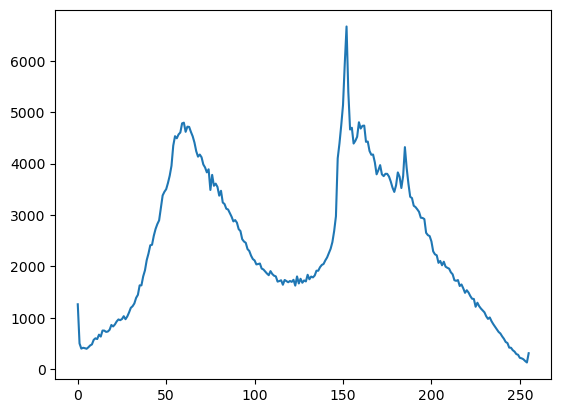

In [13]:

hist = cv2.calcHist([img], [0], None, [256], [0,256])
plt.plot(hist)

In [15]:
cv2.imshow("otsu",img_o)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
# adaptiveThreshold
# 近傍との相対的な明暗で判断
# 影が多い画像などに有効

img_ada = cv2.adaptiveThreshold(img,255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 1)

In [18]:
cv2.imshow("otsu",img_o)
cv2.imshow("ada",img_ada)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 2値化+トラックバー(実践)

In [19]:
import cv2

In [20]:
img = cv2.imread("src/floor.jpg", 0)
cv2.imshow("img",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [21]:
def onTrackBar(position):
    global threshold
    threshold = position

In [25]:
threshold = 100
cv2.namedWindow("img")

cv2.createTrackbar("track", "img", threshold, 255, onTrackBar)

while True:
    ret, img_th = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)
    cv2.imshow("img",img_th)
    cv2.imshow("src",img)
    
    if cv2.waitKey(10) == 27:
        break

cv2.destroyAllWindows()